In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('../Input/bookes_data_category_clustered.parquet')
print(df.shape)
df.head()

(171205, 14)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,x_axis,y_axis,cluster,cluster_name
0,Its Only Art If Its Well Hung!,None,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,None,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Comics & Graphic Novels,NaN,0.044563,-0.298286,1,Art
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,-0.070939,-0.392944,8,Biography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,None,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,Religion,NaN,-0.168683,0.635882,4,Religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,Fiction,NaN,0.687696,0.131479,2,Fiction
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,-0.168683,0.635882,4,Religion


In [8]:
df_cluster_centroids = df[df['categories']==df['cluster_name']].drop_duplicates('categories')[['cluster_name', 'x_axis', 'y_axis']]
df_cluster_centroids.shape

(11, 3)

In [9]:
df_cluster_centroids

,cluster_name,x_axis,y_axis
2,Religion,-0.168683,0.635882
3,Fiction,0.687696,0.131479
9,Social Science,-0.181708,0.064907
12,Juvenile Nonfiction,0.250562,-0.401286
14,History,-0.225634,0.158364
23,"Body, Mind & Spirit",-0.277774,-0.035012
50,Art,-0.125144,0.025386
81,Business & Economics,-0.313274,-0.136657
84,Computers,-0.164147,-0.034546
103,Travel,-0.140150,-0.042870


In [4]:


# Function to plot books from two publishers
def plot_books(df, publisher1, publisher2):
    # Filter the dataframe for the two publishers
    df_pub1 = df[df['publisher'] == publisher1]
    df_pub2 = df[df['publisher'] == publisher2]
    
    # Set up the plot
    plt.figure(figsize=(10, 8))
    
    # Define different markers for each cluster
    markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p']
    
    # Plot books from the first publisher
    for cluster_name, group in df_pub1.groupby('cluster_name'):
        plt.scatter(group['x_axis'], group['y_axis'], 
                    label=f"{cluster_name} ({publisher1})", 
                    marker=markers[group['cluster'].iloc[0] % len(markers)], 
                    color='red', edgecolor='black')
    
    # Plot books from the second publisher
    for cluster_name, group in df_pub2.groupby('cluster_name'):
        plt.scatter(group['x_axis'], group['y_axis'], 
                    label=f"{cluster_name} ({publisher2})", 
                    marker=markers[group['cluster'].iloc[0] % len(markers)], 
                    color='blue', edgecolor='black')
    
    # Adding labels and title
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Books Plot by Publisher and Cluster')
    plt.legend()
    plt.grid(True)
    plt.show()



In [5]:
# Function to plot density for two publishers side by side with category annotations
def plot_density_side_by_side_with_annotations(df_books, df_centroids, publisher1, publisher2):
    # Filter the dataframe for the two publishers
    df_pub1 = df_books[df_books['publisher'] == publisher1]
    df_pub2 = df_books[df_books['publisher'] == publisher2]
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
    
    # Plot density for the first publisher on the first subplot
    sns.kdeplot(ax=axes[0], x=df_pub1['x_axis'], y=df_pub1['y_axis'], cmap="Reds", shade=True, bw_adjust=.9)
    axes[0].set_title(f'Density Plot for {publisher1}')
    axes[0].set_xlabel('X Axis')
    axes[0].set_ylabel('Y Axis')
    

    
    # Plot density for the second publisher on the second subplot
    sns.kdeplot(ax=axes[1], x=df_pub2['x_axis'], y=df_pub2['y_axis'], cmap="Blues", shade=True, bw_adjust=.9)
    axes[1].set_title(f'Density Plot for {publisher2}')
    axes[1].set_xlabel('X Axis')
    
    
    # Annotate cluster centroids on both subplots
    for i in range(len(df_centroids)):
        axes[0].text(df_centroids.iloc[i]['x_axis'], df_centroids.iloc[i]['y_axis'], df_centroids.iloc[i]['cluster_name'],
                     fontsize=10, ha='center', color='black', weight='bold')
        axes[1].text(df_centroids.iloc[i]['x_axis'], df_centroids.iloc[i]['y_axis'], df_centroids.iloc[i]['cluster_name'],
                     fontsize=10, ha='center', color='black', weight='bold')
    
    plt.show()



In [6]:
df['publisher'].value_counts().head(20)

publisher
Simon and Schuster                   3450
Penguin                              2822
Routledge                            2312
John Wiley & Sons                    2011
Harper Collins                       1910
Cambridge University Press           1484
Macmillan                            1220
Courier Corporation                  1116
Vintage                               988
Open Road Media                       983
iUniverse                             928
Houghton Mifflin Harcourt             887
Springer Science & Business Media     885
Random House                          829
Oxford University Press               792
Oxford University Press, USA          723
Hachette UK                           606
HarperCollins                         586
W. W. Norton & Company                577
Univ of California Press              576
Name: count, dtype: int64

In [7]:
df[df['publisher']=='Hachette UK'].drop_duplicates('categories').sort_values(by='y_axis')

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,x_axis,y_axis,cluster,cluster_name
117203,Dealing with Life,"Does life keep making you stressed, worried an...",['Aaron Balick (Dr)'],http://books.google.com/books/content?id=f_nbD...,http://books.google.nl/books?id=f_nbDwAAQBAJ&p...,Hachette UK,2020-05-14,https://play.google.com/store/books/details?id...,Juvenile Nonfiction,NaN,0.250562,-0.401286,6,Juvenile Nonfiction
2598,KGB/CIA,'Reads like Tinker Taylor Soldier Spy' -James ...,['Robert Baer'],http://books.google.com/books/content?id=ibZGE...,http://books.google.nl/books?id=ibZGEAAAQBAJ&p...,Hachette UK,2022-05-19,https://play.google.com/store/books/details?id...,Biography & Autobiography,NaN,-0.070939,-0.392944,8,Biography
1673,Tiger Lil,"In the forbidden woods of Neverland, Tiger Lil...",['Jodi Lynn Anderson'],http://books.google.com/books/content?id=ZO285...,http://books.google.nl/books?id=ZO285l58iQkC&p...,Hachette UK,2013-10-03,https://play.google.com/store/books/details?id...,Juvenile Fiction,55.0,0.414517,-0.334272,6,Juvenile Nonfiction
12714,Detours,One of Lambda Literary's Most Anticipated Book...,['Zachary Sergi'],http://books.google.com/books/content?id=_0ASE...,http://books.google.nl/books?id=_0ASEAAAQBAJ&p...,Hachette UK,2021-09-07,https://play.google.com/store/books/details?id...,Young Adult Fiction,1.0,0.278120,-0.326500,6,Juvenile Nonfiction
14651,A Big Storm Knocked It Over,"In her fifth and final novel, acclaimed author...",['Laurie Colwin'],http://books.google.com/books/content?id=Uur7D...,http://books.google.nl/books?id=Uur7DwAAQBAJ&p...,Hachette UK,2021-03-18,https://play.google.com/store/books/details?id...,Literary Collections,4.0,0.020657,-0.311674,1,Art
72660,Because It's Christmas: Love That Man (Harlequ...,Devised by the man recorded in Guinness as the...,['Howard Stephen Berg'],http://books.google.com/books/content?id=seg4A...,http://books.google.com/books?id=seg4AQAAQBAJ&...,Hachette UK,2008-12-14,http://books.google.com/books?id=seg4AQAAQBAJ&...,Language Arts & Disciplines,1.0,-0.142408,-0.185911,1,Art
19540,"Shetland Breeds, 'Little Animals....Very Full ...",This one-of-a-kind encyclopedia shines a spotl...,"['Carol Ekarius', 'Deborah Robson']",http://books.google.com/books/content?id=8HV4E...,http://books.google.nl/books?id=8HV4EAAAQBAJ&p...,Hachette UK,2011-06-30,https://play.google.com/store/books/details?id...,Crafts & Hobbies,NaN,-0.134832,-0.185768,7,"Body, Mind & Spirit"
211687,"Dragons, Elves and Heroes (Ballantine Adult Fa...",There is magic in the grand old tales that hav...,['Lin Carter'],http://books.google.com/books/content?id=n-O8D...,http://books.google.com/books?id=n-O8DwAAQBAJ&...,Hachette UK,2019-12-24,http://books.google.com/books?id=n-O8DwAAQBAJ&...,Literary Criticism,NaN,-0.002274,-0.165865,1,Art
1300,Photo School,This book won't tell you how to take photograp...,['Demetrius Fordham'],http://books.google.com/books/content?id=C9NbC...,http://books.google.nl/books?id=C9NbCgAAQBAJ&p...,Hachette UK,2015-09-03,https://play.google.com/store/books/details?id...,Business & Economics,NaN,-0.313274,-0.136657,10,Business & Economics
5398,The God Adventure: Embracing His Power and Pur...,"Like many people, you may find it easy to expr...",['Joyce Meyer'],http://books.google.com/books/content?id=2ppLD...,http://books.google.nl/books?id=2ppLDwAAQBAJ&p...,Hachette UK,2018-04-19,https://play.google.com/store/books/details?id...,Self-Help,NaN,-0.136806,-0.107521,7,"Body, Mind & Spirit"


/tmp/ipykernel_180818/3382453371.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[0], x=df_pub1['x_axis'], y=df_pub1['y_axis'], cmap="Reds", shade=True, bw_adjust=.9)
/tmp/ipykernel_180818/3382453371.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], x=df_pub2['x_axis'], y=df_pub2['y_axis'], cmap="Blues", shade=True, bw_adjust=.9)


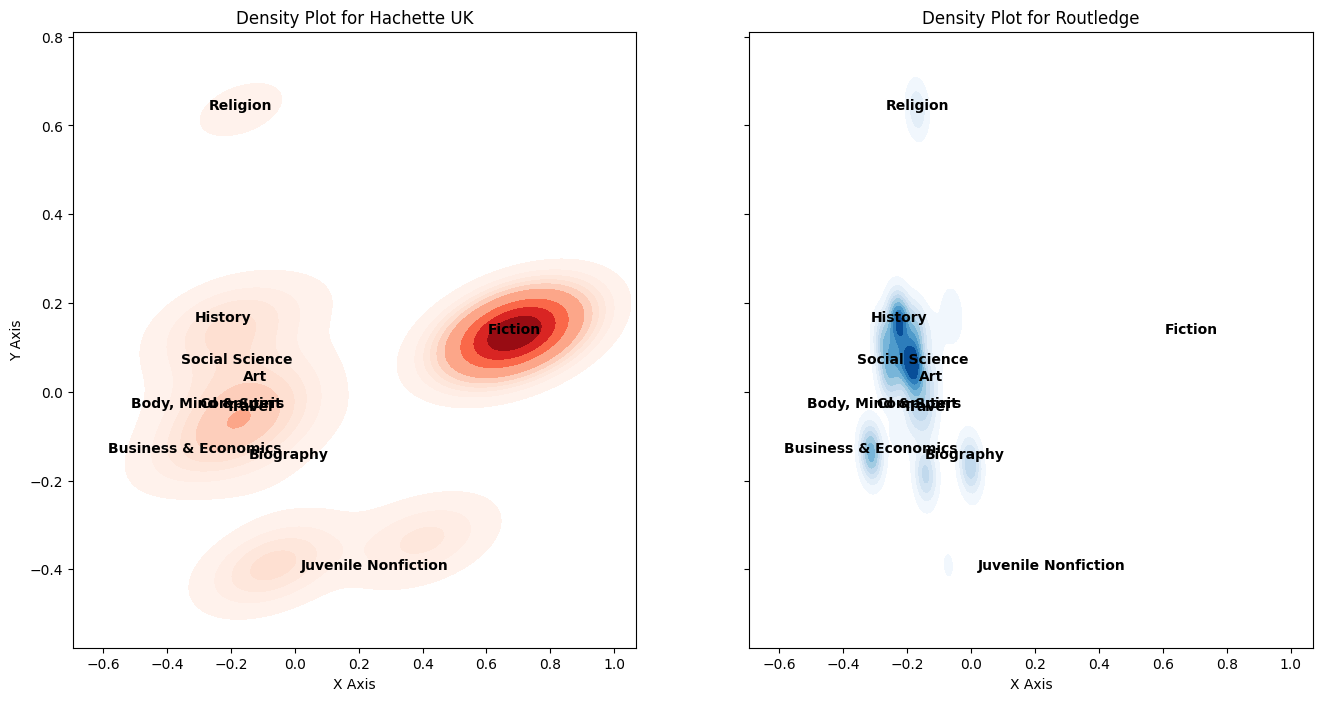

In [10]:
# Call the function with two publishers
plot_density_side_by_side_with_annotations(df, df_cluster_centroids, "Hachette UK", "Routledge")